<a href="https://colab.research.google.com/github/rdiazg14/ProductividadEmpleados/blob/main/GarmentsWorkerProductivity_RD_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Source**

https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees?select=garments_worker_productivity.csv

# Introduction

## Context

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

## Content

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

Acknowledgements
Relevant Papers:

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT). [Web Link]

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. [Web Link]

## Inspiration

This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

## Task Details

It is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.




## About this file
## Attribute Information:

01 date : Date in MM-DD-YYYY

02 day : Day of the Week

03 quarter : A portion of the month. A month was divided into four quarters

04 department : Associated department with the instance

05 teamno : Associated team number with the instance 

06 noofworkers : Number of workers in each team 

07 noofstylechange : Number of changes in the style of a particular product

08 targetedproductivity : Targeted productivity set by the Authority for each team for each day. 

09 smv : Standard Minute Value, it is the allocated time for a task 

10 wip : Work in progress. Includes the number of unfinished items for products 

11 overtime : Represents the amount of overtime by each team in minutes

12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13 idletime : The amount of time when the production was interrupted due to several reasons 

14 idlemen : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

# Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [ ]:
!wget -O garments_worker_productivity.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv

In [ ]:
# Load input data file
# RD GIT. 1.2 Configuración del DATASET y lectura inicial
#Lectura del dataset
file_name = "garments_worker_productivity.csv"

df=pd.read_csv('garments_worker_productivity.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.shape

(1197, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2015-01-01 to 2015-03-11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
mem

There are mising values in wip column

In [ ]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
df.shape

(1197, 14)

In order to have a quick overwiev of the data pairplot diagram will be used here

In [ ]:
#sns.pairplot(df)

# Categorical Features

Quarter,department and day are categorical features

In [ ]:
''' Comment'''
categorical_cols = ['quarter', 'department', 'day', 'team']

# Also team. 

In [ ]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## 1-Quarter

In [ ]:
'''Sample Code'''

for each_col in categorical_cols:
    print(each_col)
    print(df[each_col].value_counts())
    print('-----')

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
-----
department
sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
-----
day
Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64
-----
team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64
-----


In [ ]:
''' Actually You can do this for all columns like this '''

for each_col in df.columns:
    print(each_col)
    if len(df[each_col].unique()) < 20 :
        print(df[each_col].value_counts())
    else:
        print("More than 20 unique values")
    print('-----')

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
-----
department
sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
-----
day
Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64
-----
team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64
-----
targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64
-----
smv
More than 20 unique values
-----
wip
More than 20 unique values
-----
over_time
More than 20 unique values
-----
incentive
More than 20 unique values
-----
idle_time
0.0      1179
3.5         3
4.0         2
4.5         2
8.0         2
5.0         2
2.0         2
270.0       1
150.0       1
6.5       

Comment:

Do you think no_of_style_change be a categorical variable? I think this qualifies for a ordinal variable. So I would keep it label encoded. I don't want one-hot encoder.

In [ ]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

There are 5 quarter as quarter 1, quarter 2, quarter 3, quarter 4, quarter 5, which are not evenly distributed

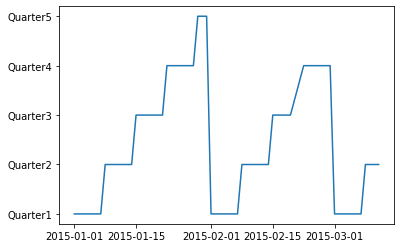

In [ ]:
pyplot.plot(df.index,df.quarter)

When we checked the dates it can be observed that there is a repeated pattern for all quarters with time except Quarter5. We need to look into Quarter5 deeply. There should be a reason for that exception 

In [ ]:
df_1=df[df['quarter']=='Quarter5']

In [ ]:
df_1.shape

(44, 14)

In [ ]:
df_1.index

DatetimeIndex(['2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31'],
              dtype='datetime64[ns]', name='date', freq=None)

Quarter5 contains 2 days as 29th and 31th of January. 

## 2-Department

In [ ]:
df.department.value_counts() 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

There are 3 department namely sweing, finishing and finishing but we need to collect them into two group

In [ ]:
df=df.replace(['finishing '], ['finishing'])  
df.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

Comment-

Better code - use .strip() on strings ;)

## 3-Day

In [ ]:
df.day.value_counts() 

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

Friday is not a working day

# Numeric Features


In [ ]:
df.select_dtypes(include=np.number).columns.tolist()

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In this case we have 11 numeric feature as given above

## 1. Team

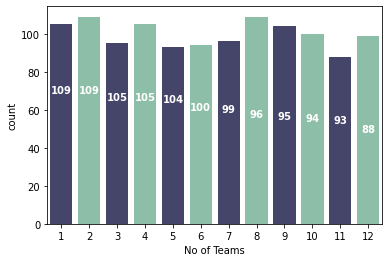

In [ ]:
ax = sns.countplot(x = 'team', data = df, palette=["#3f3e6fd1", "#85c6a9"])
plt.xlabel('No of Teams')
labels = (df['team'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 10, color = 'w', fontweight = 'bold')
plt.show()


There are 12 teams. Because It is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories, my analsys will be on team basis.

## 2. SMV

Standard Minute Value, it is the allocated time for a task

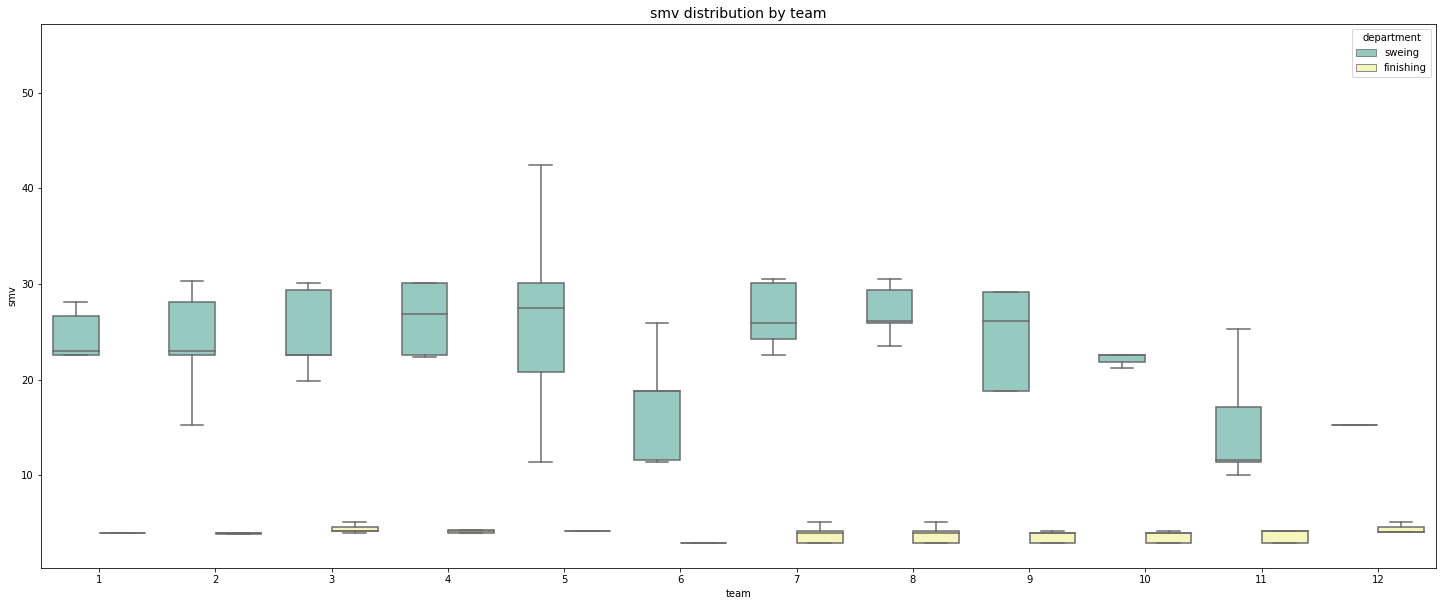

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = df,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

When we look into smv boxplot on team basis with department seperation, it can be clearly seen that while there are fluctuations between teams in the sewing department, the finishing department has almost evenly distributed smv values for each team. 

<AxesSubplot:xlabel='no_of_workers', ylabel='smv'>

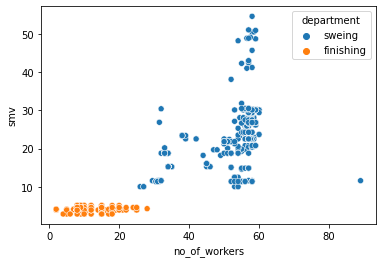

In [ ]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")

For the finising department smv doees not change with no_of_workers but 

In [ ]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

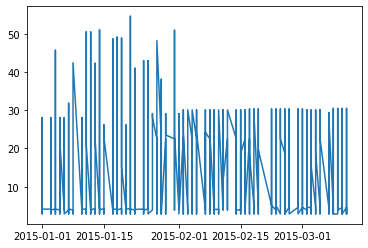

In [ ]:
pyplot.plot(df.index,df.smv)

## 3 WIP
Work in progress. Includes the number of unfinished items for products

In [ ]:
df.wip.isnull().sum()

506

There are 506 null values in wip column

<AxesSubplot:xlabel='department', ylabel='wip'>

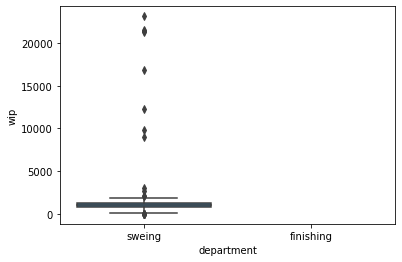

In [ ]:
sns.boxplot(x='department',y='wip',data=df)

All null values belongs to the finishing department. The finishing department needs to get a work from the sewing department. This result could mean that the finishing department has no work in progress while waiting for work from the sewing department. So we can replace the null values with zero 

In [ ]:
#df['wip'] = df['wip'].fillna(0)

In [ ]:
#df.wip.isnull().sum()

([<matplotlib.axis.YTick at 0x1a2f6ee7820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

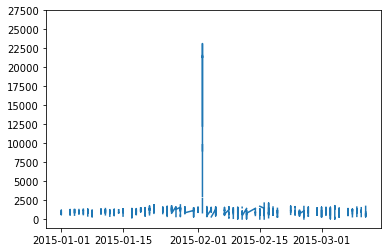

In [ ]:
pyplot.plot(df.index,df.wip)
plt.yticks(np.arange(0,30000,step=2500))

In [ ]:
df[df['wip']>2500].shape

(10, 14)

In [ ]:
df[df['wip']>2500]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-02,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
2015-02-02,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
2015-02-02,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
2015-02-02,Quarter1,sweing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
2015-02-02,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
2015-02-02,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
2015-02-02,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
2015-02-02,Quarter1,sweing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
2015-02-02,Quarter1,sweing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355


There are 10 rows with high wip values. Each of these records belongs to the sweating section in the 1st quarter and is on February 2nd.

## 4 Over Time

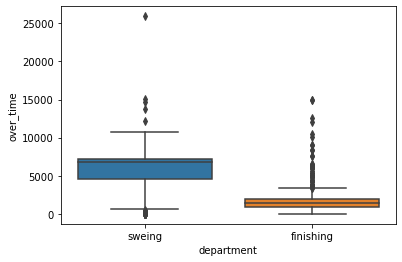

In [ ]:
sns.boxplot(x='department',y='over_time',data=df)
plt.show()

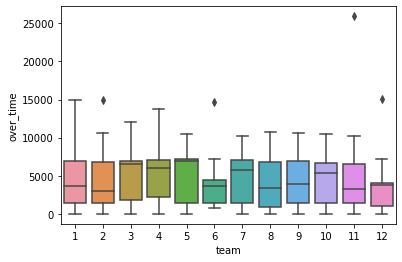

In [ ]:
sns.boxplot(x='team',y='over_time',data=df)
plt.show()

In [ ]:
over_time_by_team_department = df.groupby(['department', 'team']).median()['over_time']

for team in range(1, 12):
    for department in ['sweing', 'finishing']:
        print('Median over_time of team {} {}s: {}'.format(team, department, over_time_by_team_department[department][team]))
print('Median over_time of teams: {}'.format(df['over_time'].median()))

Median over_time of team 1 sweings: 6960
Median over_time of team 1 finishings: 1440
Median over_time of team 2 sweings: 6840
Median over_time of team 2 finishings: 1440
Median over_time of team 3 sweings: 6840
Median over_time of team 3 finishings: 1800
Median over_time of team 4 sweings: 7020
Median over_time of team 4 finishings: 1920
Median over_time of team 5 sweings: 7080
Median over_time of team 5 finishings: 1440
Median over_time of team 6 sweings: 3960
Median over_time of team 6 finishings: 960
Median over_time of team 7 sweings: 6960
Median over_time of team 7 finishings: 1440
Median over_time of team 8 sweings: 6840
Median over_time of team 8 finishings: 1440
Median over_time of team 9 sweings: 6930
Median over_time of team 9 finishings: 1140
Median over_time of team 10 sweings: 6720
Median over_time of team 10 finishings: 1440
Median over_time of team 11 sweings: 3660
Median over_time of team 11 finishings: 1440
Median over_time of teams: 3960.0


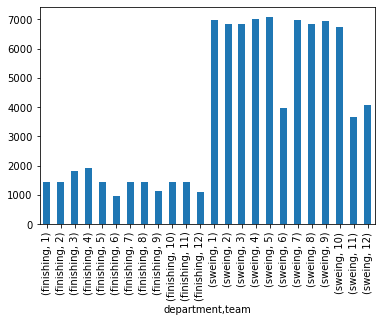

In [ ]:
over_time_by_team_department.plot.bar()
plt.show()

In [ ]:
over_time_by_team_department.head()

department  team
finishing   1       1440
            2       1440
            3       1800
            4       1920
            5       1440
Name: over_time, dtype: int64

Finishing department has relatively lower over_time values regarding sweing department. In sweing department team6, team11 and team12 have the lowest over_time values.

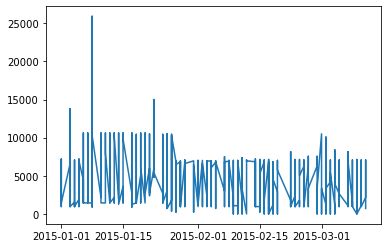

In [ ]:
pyplot.plot(df.index,df.over_time)

In [ ]:
df[df['over_time']>12000].shape

(8, 14)

In [ ]:
df[df['over_time']>12000]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-03,Quarter1,sweing,Saturday,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0,0.700134
2015-01-08,Quarter2,finishing,Thursday,4,0.80,3.94,NaN,12600,0,0.0,0,0,20.0,0.919905
2015-01-08,Quarter2,sweing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5,0.800107
2015-01-08,Quarter2,sweing,Thursday,6,0.80,11.41,411.0,14640,50,0.0,0,0,30.5,0.800025
2015-01-08,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
2015-01-22,Quarter4,sweing,Thursday,1,0.70,22.94,1384.0,12180,63,0.0,0,0,57.0,0.750162
2015-01-22,Quarter4,finishing,Thursday,1,0.70,3.94,NaN,15000,0,0.0,0,0,25.0,0.649662
2015-01-22,Quarter4,finishing,Thursday,2,0.70,3.94,NaN,15000,0,0.0,0,0,25.0,0.649662


No significant relationship was found when peak values of over_time were observed with respect to time

## 5 Incentive

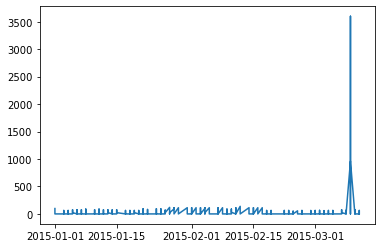

In [ ]:
pyplot.plot(df.index,df.incentive)

In [ ]:
df[df['incentive']>150].shape

(10, 14)

In [ ]:
df[df['incentive']>150]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-03-09,Quarter2,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0,0.960625
2015-03-09,Quarter2,finishing,Monday,12,0.80,4.60,NaN,0,1080,0.0,0,0,9.0,0.902963
2015-03-09,Quarter2,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0,0.864343
2015-03-09,Quarter2,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0,0.841000
2015-03-09,Quarter2,finishing,Monday,3,0.80,4.60,NaN,0,1440,0.0,0,0,12.0,0.795417
2015-03-09,Quarter2,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.795388
2015-03-09,Quarter2,finishing,Monday,1,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.794567
2015-03-09,Quarter2,finishing,Monday,2,0.70,3.90,NaN,0,1200,0.0,0,0,10.0,0.682500
2015-03-09,Quarter2,finishing,Monday,10,0.70,2.90,NaN,0,960,0.0,0,0,8.0,0.477292


All of the highest incentive values belong to the finishing department on March 9, Quarter2.

## 6 Idle Time

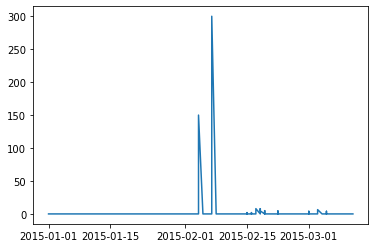

In [ ]:
pyplot.plot(df.index,df.idle_time)

In [ ]:
df[df['idle_time']>20].shape

(4, 14)

In [ ]:
df[df['idle_time']>20]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-04,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
2015-02-04,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
2015-02-07,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
2015-02-07,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319


All of the highest idle_men values belong to the sweing department on February 4 and 7, Quarter1.

## 7 Idle Men

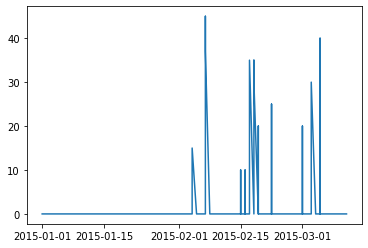

In [ ]:
pyplot.plot(df.index,df.idle_men)

In [ ]:
df[df['idle_men']>0].shape

(18, 14)

In [ ]:
df[df['idle_men']>0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-04,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
2015-02-04,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
2015-02-07,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
2015-02-07,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
2015-02-15,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
2015-02-16,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
2015-02-17,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
2015-02-17,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
2015-02-18,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574


All of the peak values of Idle_men belongs to sweing department

## 8 No_of_style_change 

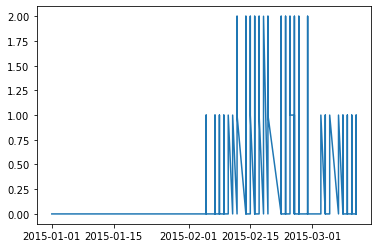

In [ ]:
pyplot.plot(df.index,df.no_of_style_change)

C:\Users\Workstation\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Workstation\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


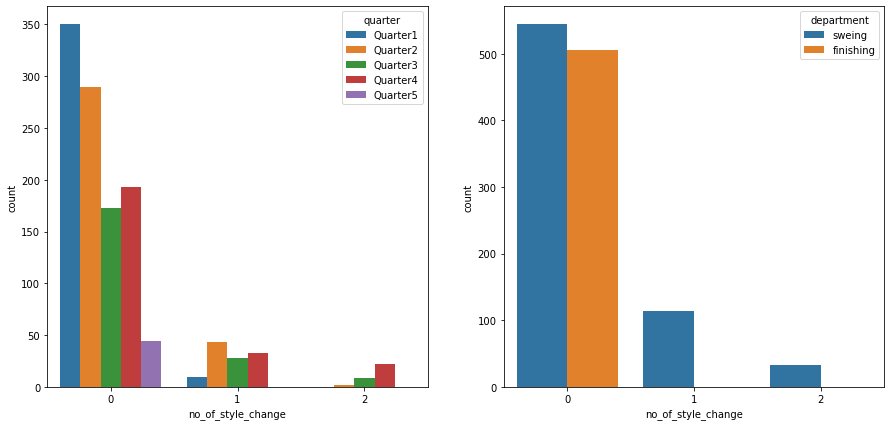

In [ ]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 2, 1)
sns.countplot('no_of_style_change',hue='quarter',data=df)
plt.xlabel('no_of_style_change')

plt.subplot(1, 2, 2)
sns.countplot('no_of_style_change',hue='department',data=df)
plt.xlabel('no_of_style_change')

plt.show()

There is no no_of_style_change in Quarter5 and all of changes occured in the sweing department

## 9 No_of_workers

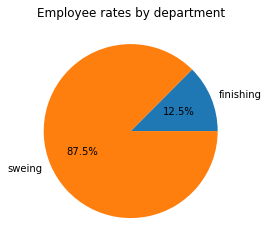

In [ ]:
data = df.groupby(['department']).no_of_workers.sum()
data.plot.pie(title="Employee rates by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

Employee rates in sweing and finishing departments are respectively %87.5 and %12.5.

## 10 Actual Productivity

C:\Users\Workstation\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual_productivity', ylabel='Density'>

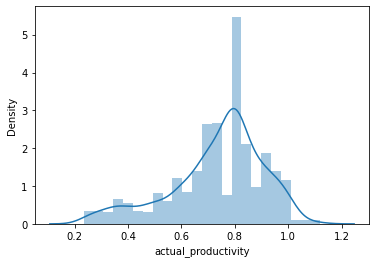

In [ ]:
sns.distplot(df.actual_productivity)

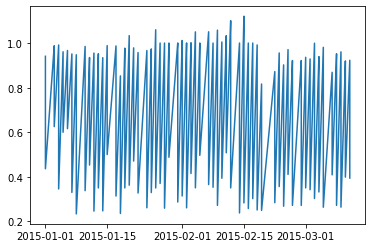

In [ ]:
pyplot.plot(df.index,df.actual_productivity)

There is no an obvious pattern with respect to time in actual_productivity

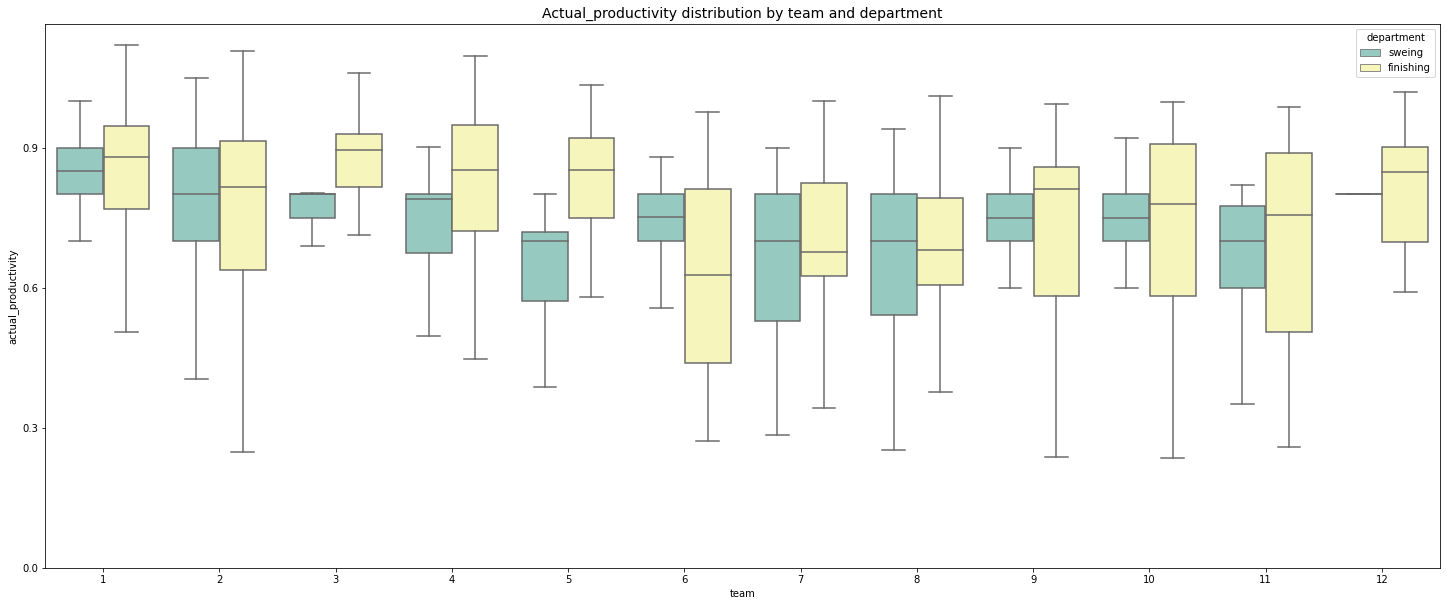

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'actual_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize= 14)
plt.show()

## 11 Targeted Productivity

C:\Users\Workstation\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='targeted_productivity', ylabel='Density'>

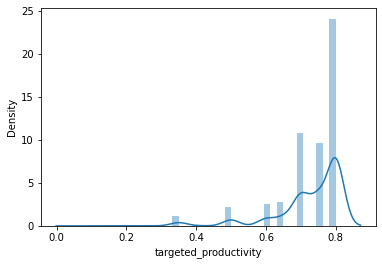

In [ ]:
sns.distplot(df['targeted_productivity'])

In [ ]:
df.targeted_productivity.value_counts()
# can be 0.07 a targeted productivity value? How can I identify if it is outlier? 

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

When we checked the dates it can be observed that there is a repeated pattern for all quarters with time except Quarter5. We need to look into Quarter5 deeply. There should be a reason for that exception 

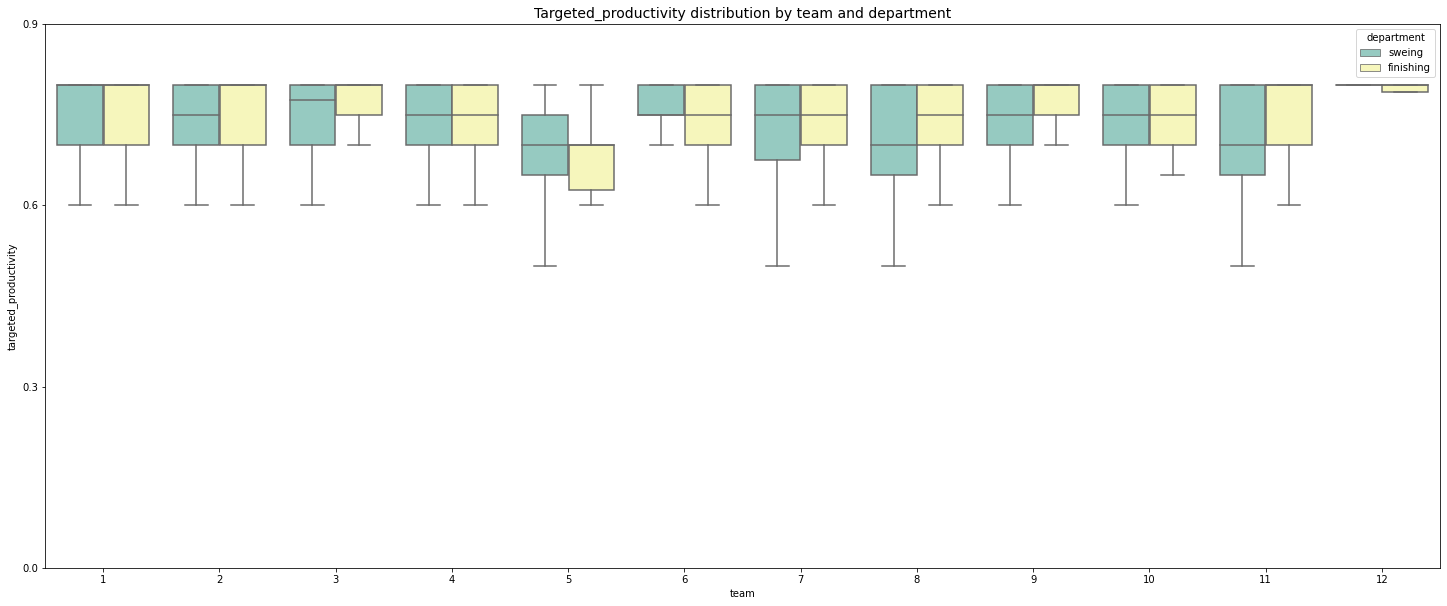

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'targeted_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Targeted_productivity distribution by team and department',fontsize= 14)
plt.show()

# Actual vs Targeted Productivity

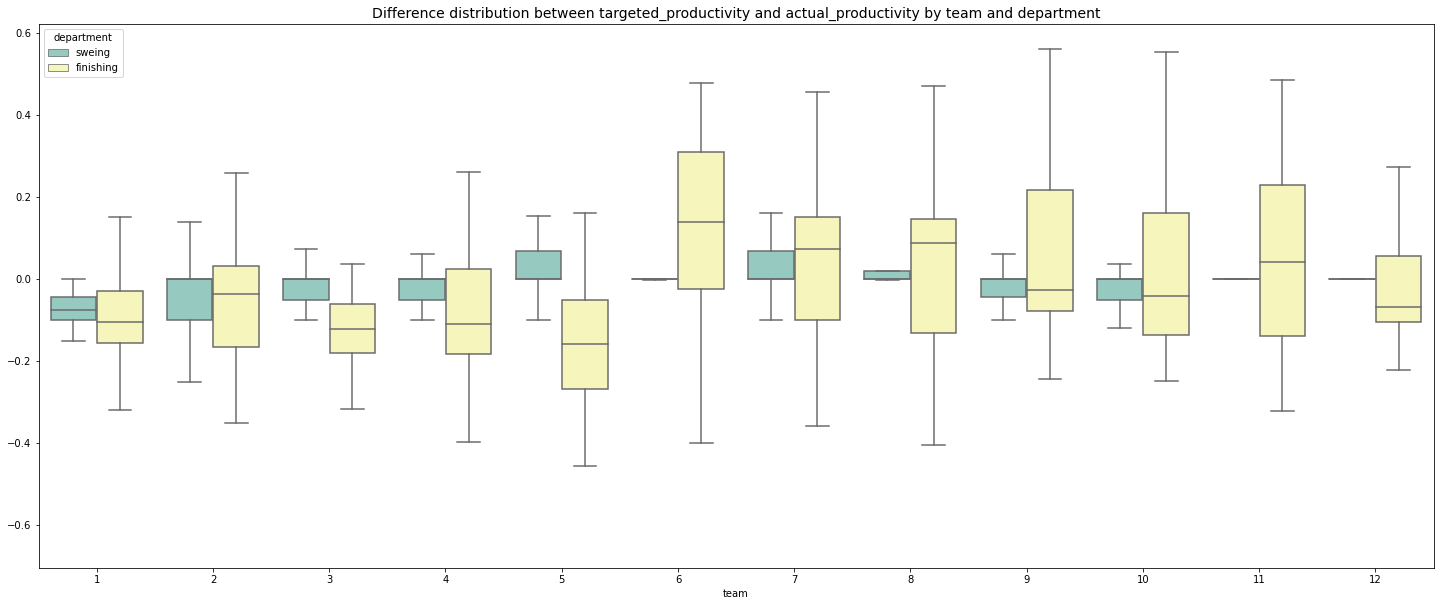

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = df.targeted_productivity-df.actual_productivity, data = df,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

There are both negative and positive variations from targeted_productivity on team and department basis. 

# EDA

##  Correlation Heatmap

In [ ]:
corr=df.corr()
mask=np.zeros(corr.shape,dtype=bool)
mask[np.triu_indices(len(mask))]=True


<AxesSubplot:>

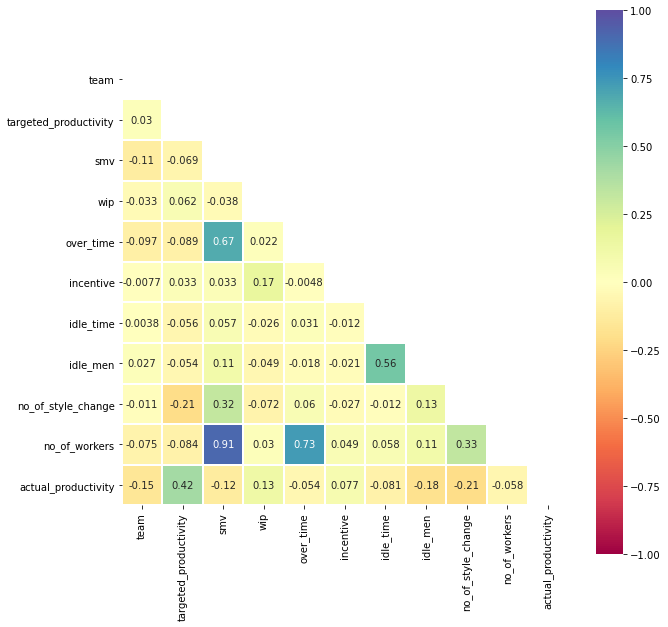

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Spectral',square=True,mask=mask,linecolor='white',linewidths=1)

**Highest Positive Correlations:**

* No_of workers and smv (0.91)
* No_of workers and over_time (0.73)
* Over_time and smv (0.67)
* Idle_men and Idle_time (0.56)


**Positive Correlations:**

* No_of workers and no_of_style_change(0.33)
* No_of_style_changehas and smv  (0.32)

There isnt any obvious negative correlation between features

## Filling in missing values of wip column

In [ ]:
df['wip'].isnull().sum()

506

In [ ]:
df['wip'].fillna(0,inplace=True)

In [ ]:
df['wip'].isnull().sum()

0

## One-hot encoding


Some columns have identified that may be useful for predicting productivity range:

* quarter
* department
* day
* team
* no_of_style_change


Before we build our model, we need to prepare these columns for machine learning.

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")
df = create_dummies(df,"no_of_style_change")
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_0',
       'no_of_style_change_1', 'no_of_style_change_2'],
      dtype='object')

## Creating Target_Label for productivity

In [ ]:
df['diff']=df.actual_productivity-df.targeted_productivity
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_0',
       'no_of_style_change_1', 'no_of_style_change_2', 'diff'],
      dtype='object')

In [ ]:
df['diff'].describe()

count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [ ]:
df['Target_label']=np.nan
df.head()
df.loc[df['diff']<0,'Target_label'] = -1
df.loc[(df['diff']==0), 'Target_label'] = 0
df.loc[df['diff']>0, 'Target_label'] = 1
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_8,team_9,team_10,team_11,team_12,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2,diff,Target_label
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,1,0,0,0,0,1,0,0,0.140725,1.0
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,0,0,0,0,0,1,0,0,0.136500,1.0
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,1,0,1,0,0,0.000570,1.0
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,1,1,0,0,0.000570,1.0
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,0,0,0,0,0,1,0,0,0.000382,1.0


If the difference between actual_productivity and targeted_productivity is positive it means productivity is in the range of over_performed,

If the difference between actual_productivity and targeted_productivity is equal to 0 it meansproductivity is in the range of  as expected,

If the difference between actual_productivity and targeted_productivity is negative it means productivity is in the range of under_performed


In [ ]:
df[df['Target_label']==0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_8,team_9,team_10,team_11,team_12,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2,diff,Target_label
date,,,,,,,,,,,,,,,,,,,,,
2015-01-10,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,...,0,0,1,0,0,1,0,0,0.0,0.0
2015-01-11,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,...,0,0,0,0,0,1,0,0,0.0,0.0
2015-01-11,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,...,0,0,1,0,0,1,0,0,0.0,0.0
2015-01-12,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,...,0,0,0,0,0,1,0,0,0.0,0.0
2015-01-13,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,...,0,0,0,0,0,1,0,0,0.0,0.0
2015-02-19,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,...,1,0,0,0,0,0,0,1,0.0,0.0


Comment

You should check the distribution of your target here and check if there is any imbalance. If there is **imbalance**, you can use **SMOTE** library to upsample or downsample OR you can use **stratified shuffle** to create your train and test sets. If almost balanced, then you can proceed with training.

## Splitting Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

columns = ['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_0',
       'no_of_style_change_1', 'no_of_style_change_2']

X = df[columns]
y = df['Target_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)

Comment

Why did you choose these columns?

In [ ]:
X_train.shape

(957, 28)

In [ ]:
y_train.shape

(957,)

In [ ]:
X_test.shape

(240, 28)

In [ ]:
y_test.shape

(240,)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Comment:

Try to use more types of scalers and read about them.

## Build Models


1. Logistic Regression
2. Decision Tree Classifiers
3. Random Forests
4. Support Vector Machines
5. K-Nearest Neighbors
6. Gaussian Naive Bayes
7. LinearDiscriminantAnalysis

In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score,recall_score,accuracy_score

## 1- Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.76


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)

conf_matrix

array([[ 18,  46],
       [ 11, 165]], dtype=int64)

## 2- Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.67


In [ ]:
clf.feature_importances_

array([0.0583783 , 0.05079768, 0.08200875, 0.04892584, 0.02000624,
       0.        , 0.0879441 , 0.0578202 , 0.06342348, 0.04061972,
       0.05634269, 0.04096699, 0.06298313, 0.02507128, 0.02894684,
       0.02097795, 0.0232573 , 0.0265711 , 0.02557217, 0.03736237,
       0.03349533, 0.01535358, 0.02734677, 0.02269258, 0.01788645,
       0.01077641, 0.00856678, 0.00590595])

In [ ]:
ft_df=pd.DataFrame()
ft_df['columns']=X_train.columns
ft_df['feature_importance']=clf.feature_importances_
ft_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Comment:

Use type to see what is X_train. X_train is a nump array and arrays won't have column names. column names are for Pandas dataframes. You should use X.columns.
Check the following commands-

`type(X_train)`
`type(X)`
`X.columns`

In [ ]:
ft_df=ft_df.sort_values(by='feature_importance',ascending=False)

In [ ]:

sns.barplot(x='feature_importance',y='columns',data=ft_df)
plt.show()

## 3- Random Forest

In [ ]:
clf_rfc=RandomForestClassifier(n_estimators=100)

clf_rfc.fit(X_train, y_train)

clf_rfc_pred=clf_rfc.predict(X_test)
    

accuracy_rfc =accuracy_score(y_test, clf_rfc_pred)

print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(clf_rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(clf_rfc.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 0.89
Accuracy of Random Forest Classifier on test set: 0.72


In [ ]:
clf.feature_importances_
ft_df_1=pd.DataFrame()
ft_df_1['columns']=X_train.columns
ft_df_1['feature_importance']=clf.feature_importances_
ft_df_1

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
ft_df_1=ft_df_1.sort_values(by='feature_importance',ascending=False)
sns.barplot(x='feature_importance',y='columns',data=ft_df_1)

## 4- Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.77
Accuracy of SVM classifier on test set: 0.76


## 5- K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.72


## 6- Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.64
Accuracy of GNB classifier on test set: 0.65


## 7- Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.75
Accuracy of LDA classifier on test set: 0.76


In [ ]:
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(clf_rfc.score(X_test, y_test)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of Logistic regression classifier on test set: 0.76
Accuracy of Decision Tree classifier on test set: 0.67
Accuracy of Random Forest Classifier on test set: 0.72
Accuracy of SVM classifier on test set: 0.76
Accuracy of K-NN classifier on test set: 0.72
Accuracy of GNB classifier on test set: 0.65
Accuracy of LDA classifier on test set: 0.76


Logistic Regression, SVM and LDA has the same accuracy. In such a case waht should be the next step?

Comment:

Really well done on improving your notebook. Gives me an impression that you have really understand your problem statement and you are able to draw conclusions.

Further improvments-

**Grid Search**
1. Select one algorithms whose accuracy is the best.
2. Use GridSearchCV to use tune the hyperparamters using Cross Validation.
3. You will then get the best values for your hyperparamters

**Organise Your ML model Results**
Do you find it difficult to scroll up and down and view the results? If so, then create a dataframe and add one row or column for the results like -

cols - performance metrics
rows - ml model

OR

rows - performance metrics
cols - ml model

**Improve ML Training Codes**

You are using fit and predict evertime right? You have done it 7 times. So why not write a function? Here is an example -

`def train_and_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.score(y_pred, y_test)
    
print(train_and_predict(LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test))`


Great job 👏